<a href="https://colab.research.google.com/github/nicolascavalli/Forma-o-em-Dados/blob/main/Desafio4_Forma%C3%A7%C3%A3o_em_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importando o dataset para o colab

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MKT.csv to MKT.csv


##Importando bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

##Etapa 1 - Análise Descritiva dos Dados

In [ ]:
df = pd.read_csv('MKT.csv')
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


###Informaçãoes Iniciais do Dataset

*   Dataset com 4 colunas e 171 linhas
*   Não há nenhuma linha em branco ou faltante
*   Todas as colunas são do tipo Float



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


###Describe para identificar padrões de distruição dos dados e possíveis outliers no dataset







In [ ]:
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


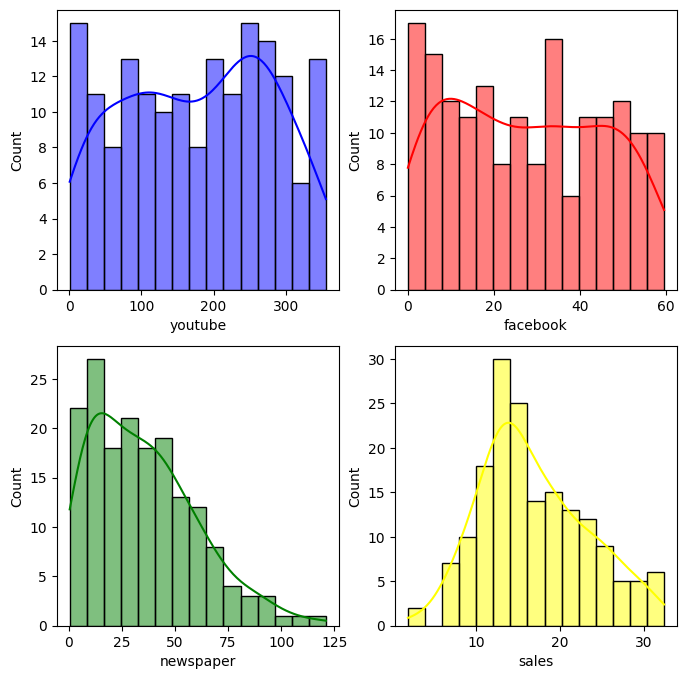

In [ ]:
figure, axs = plt.subplots(2, 2, figsize=(8,8))
sns.histplot(df, x='youtube', color = 'blue', ax=axs[0,0], kde=True, bins=15)
sns.histplot(df, x='facebook', color = 'red', ax=axs[0,1], kde=True, bins=15)
sns.histplot(df, x='newspaper', color = 'green', ax=axs[1,0], kde=True, bins=15)
sns.histplot(df, x='sales', color = 'yellow', ax=axs[1,1], kde=True,bins=15);

plt.show()

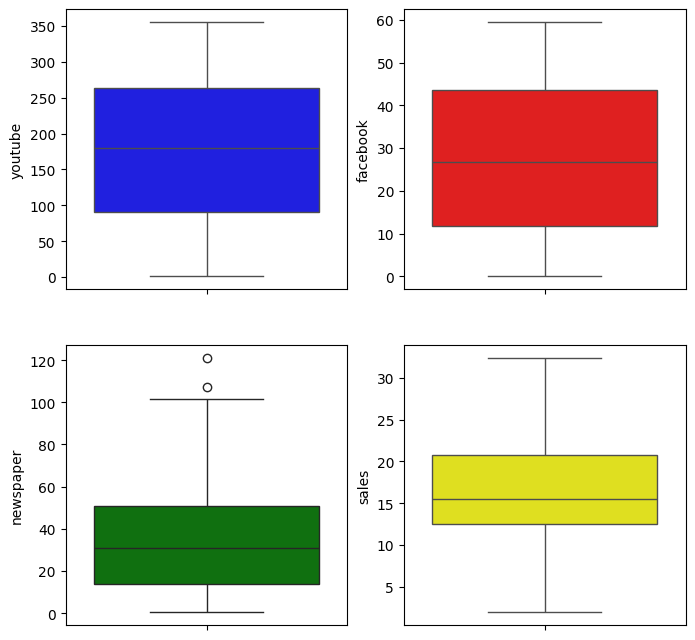

In [ ]:
figure, axs = plt.subplots(2, 2, figsize=(8,8))
sns.boxplot(df, y='youtube',color='blue', ax=axs[0,0])
sns.boxplot(df, y='facebook',color='red', ax=axs[0,1])
sns.boxplot(df, y='newspaper',color='green', ax=axs[1,0])
sns.boxplot(df, y='sales',color='yellow', ax=axs[1,1]);
plt.show()

Analisando os gráficos e describes acima, notamos que a coluna 'sales' apresenta uma distribuição mais normal em relação às outras features.
Também a coluna 'newspaper' possui alguns outliers quando o valor é maior que 100 e por isso serão tratados em etapas futuras.

##Etapa 2 - Análise Exploratória dos Dados

###Identificando padrões e relação entre as variáveis do dataset

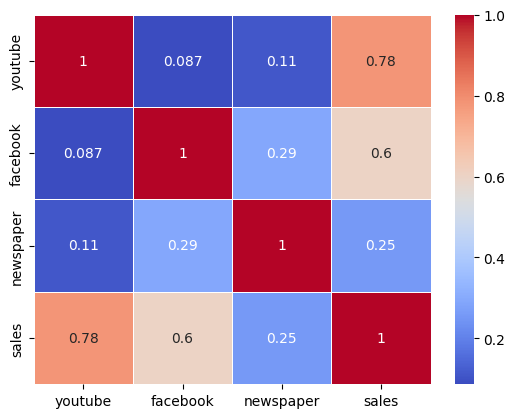

In [ ]:
#Correlação entre as variáveis utilizando o visual heatmap como apoio
sns.heatmap(df.corr(), annot=True, linewidths=0.5, cmap='coolwarm');

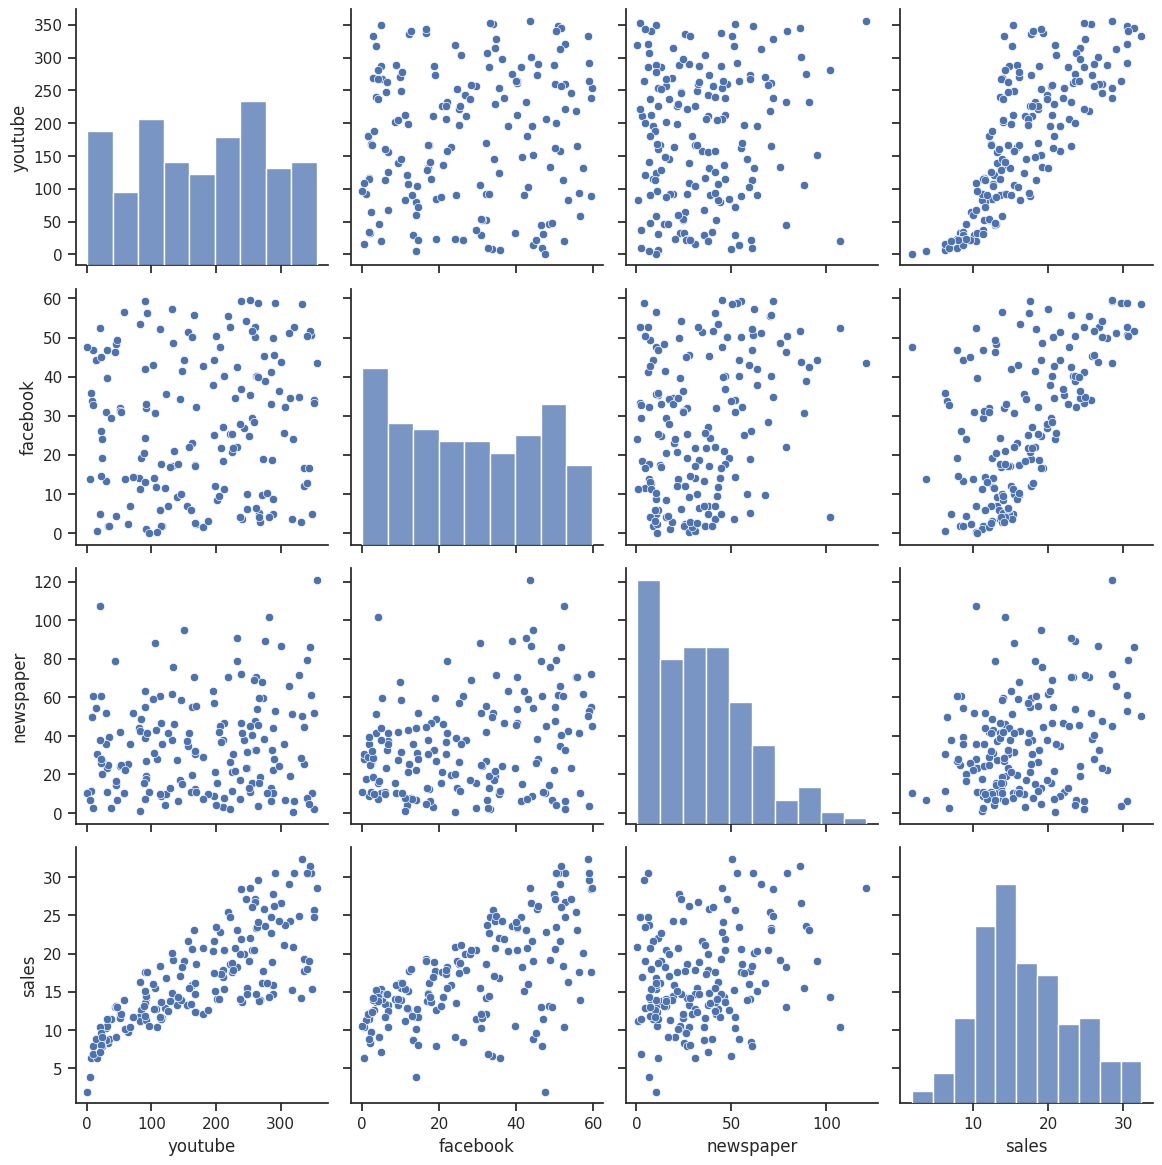

In [ ]:
#Verificando a distruição das variáveis bem como correlações utilizando o scatterplot
sns.set_theme(style='ticks')
figure = sns.pairplot(df)
figure.fig.set_size_inches(12, 12)

Analisando as visualizações acima, notamos que uma maior correlação entre as variáveis de 'youtube' e 'sales' e entre as variáveis 'facebook' e 'sales'.

##Etapa 3 - Modelagem

In [ ]:
#Iniciando o treinamento do modelo selecionado
df_X = df[['youtube', 'facebook', 'newspaper']]
df_y = df[['sales']]
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.25, random_state=42)

In [ ]:
print(X_train.shape)

(128, 3)


In [ ]:
print(X_test.shape)

(43, 3)


In [ ]:
print(y_train.shape)

(128, 1)


In [ ]:
print(y_test.shape)

(43, 1)


In [ ]:
#Colocando no modelo selecionado
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(n_jobs=5)

##Etapa 4 - Calculando Predição

In [ ]:
#Predição do Modelo
y_pred = lr.predict(X_test)

#Analisando a assertividade do modelo
r = r2_score(y_test, y_pred)
print(r)

0.8800076986272555


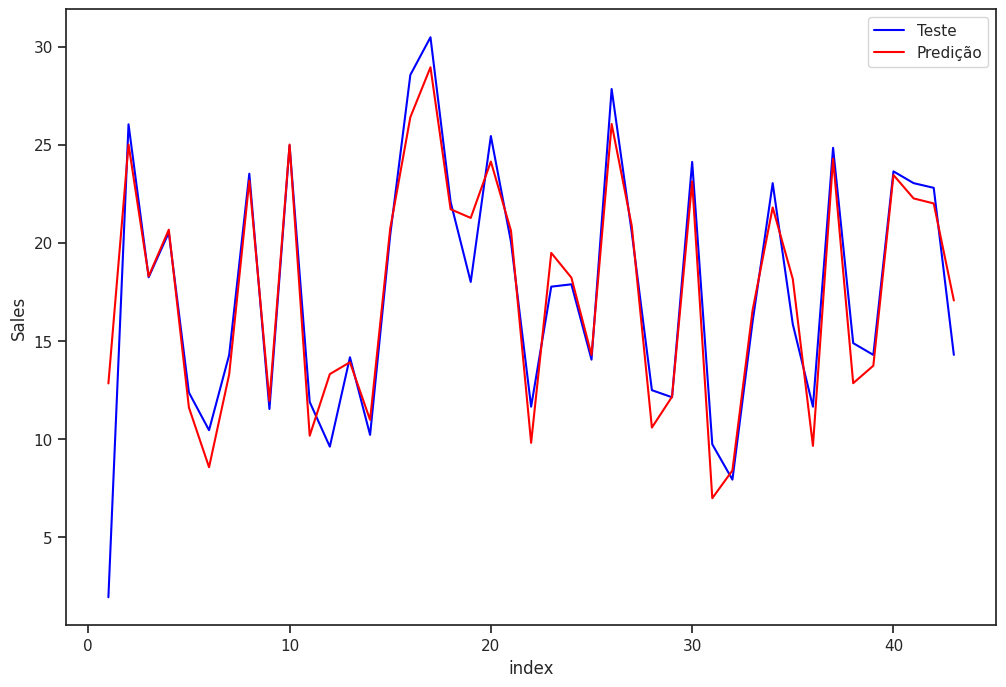

In [ ]:
#Analisando a assertividade visualmente
c = [i for i in range(1, 44, 1)]
fig = plt.figure(figsize=(12, 8))
plt.plot(c, y_test, color='blue', label='Teste')
plt.plot(c, y_pred, color='red', label='Predição')
plt.legend(loc='upper right')
plt.xlabel('index')
plt.ylabel('Sales');

In [ ]:
#Testando a predição
youtube = 90
facebook = 32
newspaper = 45
teste_pred = [[youtube, facebook, newspaper]]
lr.predict(teste_pred)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.84578475])

In [ ]:
#Testando a predição
youtube = 150
facebook = 20
newspaper = 30
teste_pred = [[youtube, facebook, newspaper]]
lr.predict(teste_pred)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14.18641413])